In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [105]:
source = 'http://bit.ly/w-data'
data = pd.read_csv(source)

data

,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30
5,1.50,20
6,9.20,88
7,5.50,60
8,8.30,81
9,2.70,25


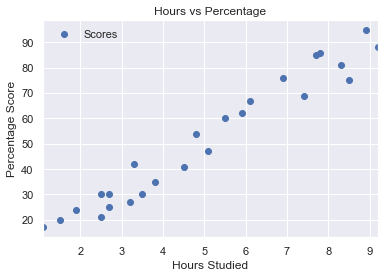

In [106]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', pad=5)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend(frameon=False)
plt.show()

In [107]:
from sklearn.model_selection import train_test_split 

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [108]:
from sklearn.dummy import DummyRegressor

dum_model = DummyRegressor(strategy='median').fit(X_train, y_train)
#print('Test score\n')
#print(dum_model.score(X_test, y_test))
print('\nTrain score\n')
print(dum_model.score(data['Hours'], data['Scores']))


Train score

-0.049638217569906384


In [109]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
data.shape

(25, 2)

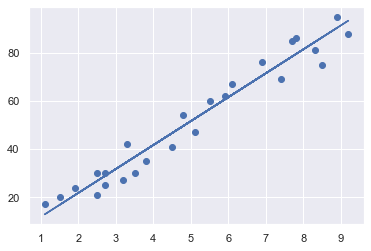

In [111]:
plot_line = lr.coef_*X + lr.intercept_

plt.scatter(X, y)
plt.plot(X, plot_line)
plt.show()

In [112]:
print('Training score')
print(lr.score(X_train, y_train))
print('\nTest score')
print(lr.score(X_test, y_test))

Training score
0.9484509249326872

Test score
0.9367661043365054


In [113]:
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [114]:
df

,Actual,Predicted
0,20,16.84
1,27,33.75
2,69,75.50
3,30,26.79
4,62,60.59
5,35,39.71
6,24,20.82


In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.130879918502486


In [116]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 20.33292367497997


In [117]:
#for 9.25 hrs a day

hours = np.array([9.25])

In [118]:
hours = hours.reshape(-1, 1)

In [119]:
hours.shape

(1, 1)

In [120]:
ques = lr.predict(hours)
print('No. of hours', hours[0][0])
print('\nPredicted Score: ',ques)

No. of hours 9.25

Predicted Score:  [93.89272889]


In [121]:
#!pip install lazypredict
#!pip install xgboost
import xgboost as xgb
from lazypredict.Supervised import LazyRegressor


In [122]:
!pip install lightgbm

In [123]:
clf = LazyRegressor(ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 38/38 [00:01<00:00, 33.60it/s]


In [124]:
models

,R-Squared,RMSE,Time Taken
Model,,,
Lasso,0.94,4.36,0.01
Ridge,0.94,4.36,0.01
ElasticNetCV,0.94,4.38,0.07
SGDRegressor,0.94,4.46,0.01
LassoCV,0.94,4.46,0.07
RidgeCV,0.94,4.47,0.01
BayesianRidge,0.94,4.49,0.01
OrthogonalMatchingPursuit,0.94,4.51,0.01
LarsCV,0.94,4.51,0.03


In [125]:
from sklearn.linear_model import Lasso
model1 = Lasso()
model1.fit(X_train, y_train)
print('Test scores')
print(model1.score(X_test, y_test))
print('\nTrain scores')
print(model1.score(X_train, y_train))

Test scores
0.9393762844243659

Train scores
0.9481895678598381


In [126]:
my_pred = model1.predict(hours)

In [127]:
print('Hours : 9.25')
print('Predicted Score:',my_pred[0])

Hours : 9.25
Predicted Score: 93.27477397173055


### By using Lazy Regressor, we can see that Lasso gives a tad better score on the test set then Linear Regression. 

In [128]:
print('Linear Regression')
print('Test score: ',lr.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',ques[0])
print('\n------------------------\n')
print('Lasso')
print('Test score: ',model1.score(X_test, y_test))
print('Predicted score for 9.25 hours: ',my_pred[0])

Linear Regression
Test score:  0.9367661043365054
Predicted score for 9.25 hours:  93.89272889341655

------------------------

Lasso
Test score:  0.9393762844243659
Predicted score for 9.25 hours:  93.27477397173055
